In [1]:
import pasttrec_ctrl as ptc

from fst import *
from my_utils import *

# import micos_eco
# import phidrive
import numpy as np
import time
import os



import IPython.display as ipd
import numpy
sr = 24050 # sample rate
T = .2    # seconds
Hz=790
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*Hz*t)        
ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array




Welcome to JupyROOT 6.14/04


In [2]:
# measurement parameters individual settings:
id = "id02_peakingtime_HV1650V"
#threshold_list = [6, 8, 10, 12, 15, 20, 25, 30, 40, 50]
#threshold_list = range(10,60,2) 
acq_time = 30  #  sec
sync_spill_end = False
ptime_list = [   10  ]
# set PASTTREC default threshold for the measurement
pt_gain_list = [  4  ] 
pt_threshold_list = [ 5  ]
spike_reject_list_TDC = [ 5 ]

#-----------------------


#predefined systematic measurements for input stage comparison:
measurement_setting = 29  #1 or 2 ... or 7
################################################
if (measurement_setting == 1):
    id = "id020_highintensityBeam_HV1600V_sr_Scan"
    ptime_list = [   10 ,15 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  2,4 ] 
    pt_threshold_list = [ 5  ]
    spike_reject_list_TDC = [0,1,2,3,4,5,6,7,8]
    acq_time = 60*6  #  sec
    sync_spill_end = True
elif  (measurement_setting == 2):
    id = "id02_peakingtime_HV1650V_highintensityBeam"
    ptime_list = [   10, 15 ,20 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  4 ] 
    pt_threshold_list  =  [10]
    acq_time = 60*6  #  sec
    sync_spill_end = True
elif  (measurement_setting == 3):
    id = "id021_highintensityBeam_HV1600V_thr_Scan"
    ptime_list = [   10 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  4 ] 
    pt_threshold_list  = range(5,40,2)
    spike_reject_list_TDC = [4]
    acq_time = 60*6  #  sec
    sync_spill_end = True
elif (measurement_setting == 4):
    id = "id022_TDCdesign7_oscillator_not_for_ch01804_5_example_HV1650V"
    ptime_list = [   10 ,15 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  2,4 ] 
    pt_threshold_list = [ 5, 10, 20  ]
    spike_reject_list_TDC = [4, 8]
    acq_time = 60*3  #  sec
    sync_spill_end = True
elif (measurement_setting == 6):
    id = "id023_TDCdesign7_oscillator_not_for_ch01804_5_thrscanGain4_HV1700V"
    ptime_list = [   10  ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [ 2, 4 ] 
    pt_threshold_list =  range(5,40,2)
    spike_reject_list_TDC = [8]
    acq_time = 60*3  #  sec
    sync_spill_end = False
elif (measurement_setting == 5):
    id = "id024_TDCdesign7_oscillator_not_for_ch01804_5_example_HV1700V"
    ptime_list = [   10 ,15,20 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  1,2,4 ] 
    pt_threshold_list = [5,10,30]
    spike_reject_list_TDC = [0,8]
    acq_time = 60*3  #  sec
    sync_spill_end = False
    ########################################### SOnntag ##################
elif  (measurement_setting == 20):
    id = "id020_peakingtime-gain-thres-scan_HV1750V_lowintensityBeam"
    ptime_list = [   10, 15   ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  2, 4 ] 
    pt_threshold_list  =  [5,7,10,15]
    spike_reject_list_TDC = [0]
    acq_time = 60*2  #  sec
    sync_spill_end = False
    #######################
elif  (measurement_setting == 21):
    id = "d021_HV-scan_setting_C_lowintensityBeam"
    ptime_list = [   10 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  2 ] 
    pt_threshold_list= [9]
    spike_reject_list_TDC = [1700,1650,1600]
    acq_time = 60*6  #  se    
elif  (measurement_setting == 22):  ### HV = 1600V
    id = "d022_highstat_settingA_lowintensityBeam"
    ptime_list = [   15 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  4 ] 
    pt_threshold_list= [10]
    spike_reject_list_TDC = [0]
    acq_time = 60*10  #  se        
elif  (measurement_setting == 23):  ### HV = 1600V
    id = "d023_highstat_settingB_lowintensityBeam"
    ptime_list = [   10 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  2 ] 
    pt_threshold_list= [7]
    spike_reject_list_TDC = [0]
    acq_time = 60*10  #  se  
elif  (measurement_setting == 24):  ### HV = 1600V
    id = "d024_highstat_settingC_lowintensityBeam"
    ptime_list = [   10 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  2 ] 
    pt_threshold_list =[9]
    spike_reject_list_TDC = [0]
    acq_time = 60*10  #  se  
    ####################### TRBFLASHEN .... 1802
elif  (measurement_setting == 25): 
    ####HV = 1750 V
    id = "d025_highstat_spikereject_lowintensityBeam"
    ptime_list = [   10 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  2  ] 
    pt_threshold_list =[7]
    spike_reject_list_TDC = [7]
    acq_time = 60*10  #  se 
    #######################TRBFLASHEN .zurück... 1802
elif  (measurement_setting == 26):  ### HV = 1750V
    id = "d026_highstat_settingA_lowintensityBeam"
    ptime_list = [   15 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  4 ] 
    pt_threshold_list= [10]
    spike_reject_list_TDC = [0]
    acq_time = 60*10  #  se        
    ####################################
elif  (measurement_setting == 27):
    id = "d027_highstat_PandaPT_lowintensityBeam"
    ptime_list = [   10 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  2  ] 
    pt_threshold_list = range(5,30,3)
    spike_reject_list_TDC = [0]
    acq_time = 70*1  #  se  
elif  (measurement_setting == 28):  ### HV = 1750V
    id = "d028_highstat_settingA_lowintensityBeam"
    ptime_list = [   15 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  4 ] 
    pt_threshold_list= [10]
    spike_reject_list_TDC = [0]
    acq_time = 60*10  #  se        
elif  (measurement_setting == 29):  ### HV = 1750V
    id = "d029_highstat_settingB_lowintensityBeam"
    ptime_list = [   10 ]
    # set PASTTREC default threshold for the measurement
    pt_gain_list = [  2 ] 
    pt_threshold_list= [7]
    spike_reject_list_TDC = [0]
    acq_time = 60*10  #  se      
sync_spill_end = False        
    
board_list = [ "0900", "0901","0902","0903","0904", "0905","0906","0907","0003"]
TDClist = ["0x1800","0x1801","0x1802","0x1803","0351"]

scinti_rate = [[] for i in range(0,2)]
    
# end of parameters to edit ############
print(id)
import datetime
now = datetime.datetime.now()
print("Starting now {:s} ".format(str(now)))

full_loop_time = acq_time
if sync_spill_end:
    acq_time = 18
    full_loop_time = 78 # full spill
minutes = len(pt_threshold_list)*(full_loop_time)*len(pt_gain_list)*len(ptime_list)*len(spike_reject_list_TDC)/60
hours = minutes/60
print("estimated scan duration {:3.1f} minutes or {:3.2f} hours".format(minutes,hours))
end = datetime.datetime.now() + datetime.timedelta(0,minutes*60)
print("finsh at  {}(estimated)",format(end))

#print("End at {:s} ".format(str(now+"11:00:11")))

d029_highstat_settingB_lowintensityBeam
Starting now 2021-05-23 20:50:57.470612 
estimated scan duration 10.0 minutes or 0.17 hours
finsh at  {}(estimated) 2021-05-23 21:00:57.471060


In [3]:
# load  channels inOCSY beam spot may 2021
import os
os.system("trbcmd loadbit {} 0xd580 0x300 0x{}00".format("0x1800", 2))
os.system("trbcmd loadbit {} 0xd580 0x300 0x{}00".format("0x1803", 0))
# COSY May2021 beam position:
os.system("trbcmd loadbit {} 0xd580 0x300 0x{}00".format("0x1801", 0))
os.system("trbcmd loadbit {} 0xd580 0x300 0x{}00".format("0x1802", 2))

#Set coinicedence of 2 scintillator trigger:
import os
# configure Coincidenc logic: channels 48 (0x30) & 49  (0x31)
os.system("trbcmd w  0x0350 0xdf40  0x80003130")
# set output channel of coincidence signal :
os.system("trbcmd w  0x0350 0xdf34  0x20000")
# set coincidence signal to trigger input FPGA Inputs1
os.system("trbcmd w 0xc035 0xa150 0x00000004")  # trg_periph_config1: mask=0000 0000 0000 0000 0100
# activate coincidence trigger only:
#os.system("trbcmd w 0xc035 0xa101 0xffff0800")
# activate scintillator1 trigger (ch49) only:
os.system("trbcmd w 0xc035 0xa101 0xffff0400")  # trg_channel_mask: edge=1111 1111 1111 1111, mask=0000 0100 0000 0000

0

In [4]:
import scalers
#trigger_ufsd()
# trigger_scinti()
for ptime in ptime_list: 
 for pt_gain in pt_gain_list:     
  for pt_threshold in pt_threshold_list:  
   for spike_reject_TDC in spike_reject_list_TDC:
         #setTDC spike rejection to ~50ns 
    os.system("trbcmd loadbit 0x1801 0xd580 0xf0000000 0x{:d}0000000".format(spike_reject_TDC))        

    print("")
    print("##############################")
    print("##### setting threshold {:d}".format(pt_threshold))
    print("##### peaking time   {:d} ".format(ptime))
    print("##### gain {:d} ".format(pt_gain))
    print("##### spike rejection  {:d}".format(spike_reject_TDC))
    print("##############################")
#     micos_eco.move(x=x,y=y)
#     if (phi != phidrive.get_angle() ): 
#         phidrive.set_angle(phi)
    ptc.init_active_boards()
    ptc.init_boards_by_name(board_list, ptime, pt_gain, pt_threshold)   
    #wait_for_spill(threshold_rate=3000)
    scinti_rate[0] += scalers.scaler_rate("0x0350",[49],4)
    scinti_rate[1] += scalers.scaler_rate("0x0350",[50],4)
    
    if acq_time < 70 :
      wait_for_spill_break(threshold_rate=30000)
      wait_for_spill(threshold_rate=30000)
    if sync_spill_end :
      print("wait 45s until last 10s of spill (low intensity)")
      time.sleep(45)
    print("##### start taking data ######")

    filelabel = "{:s}_thr{:d}_{:d}s_pt{:d}_gain{:d}_sr{:d}".format(id,pt_threshold,acq_time,ptime,pt_gain,spike_reject_TDC)
    print("file = "+filelabel)
    take_raw_data(time=acq_time,label=filelabel) 
    print("##### stopped data taking ######")
    
#     import IPython.display as ipd
#     # ipd.Audio('./tock.wav') # load a local WAV file
#     import numpy
#     sr = 24090 # sample rate
#     T = 0.5    # seconds
#     Hz=500
#     t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
#     x = 0.5*numpy.sin(2*numpy.pi*Hz*t)    
#     x, rate=sr, autoplay=True) # load a NumPy array  
#     time.sleep(5)
    


##############################
##### setting threshold 7
##### peaking time   10 
##### gain 2 
##### spike rejection  0
##############################
##### start taking data ######
file = d029_highstat_settingB_lowintensityBeam_thr7_600s_pt10_gain2_sr0
##### stopped data taking ######
EventBuilder   0.121014 Set threads layout to balanced
EventBuilder   0.122436 Library loaded libDabcMbs.so
EventBuilder   0.123911 Library loaded libDabcHadaq.so
EventBuilder   0.125123 Library loaded libDabcHttp.so
EventBuilder   0.129984 Library loaded libDabcStream.so
EventBuilder   0.132372 Start DABC server on localhost:1237
EventBuilder   0.133456 JSROOTSYS = /trb3/dabc/plugins/root/js 
EventBuilder   0.133470 HTTPSYS = /trb3/dabc/plugins/http
EventBuilder   0.134040 Starting HTTP server on port(s) 8091
EventBuilder   0.135872 Application mainloop is now running
EventBuilder   0.135888        Press Ctrl-C for stop
EventBuilder   0.136006 POOL:Pool bufsize:400000 X num:100
EventBuilder   0.137738

rm: cannot remove '/workdir/data/*.hld': No such file or directory
dabc_exe: no process found


archived to ./archive/2021-05-23_21-01-08_take_data_beamtime2021_d029_highstat_settingB_lowintensityBeam_600s


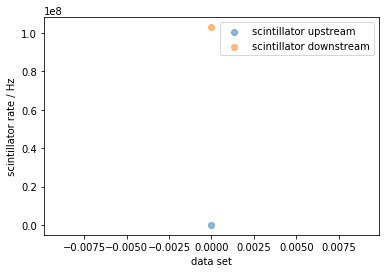

In [5]:
archive(label="{:s}_{:d}s".format(id,acq_time))

from matplotlib import pyplot as plt
%matplotlib inline
# plt.figure(num=None, figsize=(5, 4), dpi=80, facecolor='w', edgecolor='k') 
plt.scatter(range(0,len(scinti_rate[0])),scinti_rate[0],alpha=0.5,label = "scintillator upstream")
plt.scatter(range(0,len(scinti_rate[1])),scinti_rate[1],alpha=0.5,label = "scintillator downstream")
plt.xlabel("data set")
plt.ylabel
plt.ylabel(" scintillator rate / Hz ")
#plt.yscale('log')
plt.legend()

plt.savefig('{:s}/{:s}_tot_data_cosy2021_lena_beam_intensity.png'.format("/workdir/data/",id), dpi=100)
plt.show()



In [6]:


import IPython.display as ipd
# ipd.Audio('./tock.wav') # load a local WAV file

import numpy
sr = 24090 # sample rate
T = 0.5    # seconds
Hz=500
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*Hz*t)    


ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array  